In [36]:
import numpy as npy
import matplotlib.pyplot as plt
from scipy import interpolate
import cv2
import copy
from scipy.interpolate import LinearNDInterpolator as scind
from scipy.interpolate import RegularGridInterpolator as scirgi
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [4]:
# cd VectorFields/
# cd ..


/home/tanmay/Research/Code/VectorFields


In [5]:
trans_model = npy.load("Data/Transition_Model.npy")
i = 7
policy = npy.load("Data/Policy_{0}.npy".format(i)).astype(int)
action_space = npy.array([[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]])
discrete_size = 50

In [6]:
N=50
Y,X = npy.mgrid[0:N,0:N]

U = npy.zeros(shape=(discrete_size,discrete_size))
V = npy.zeros(shape=(discrete_size,discrete_size))

for i in range(0,discrete_size):
	for j in range(0,discrete_size):
		U[i,j] = action_space[policy[i,j]][0]
		V[i,j] = action_space[policy[i,j]][1]		

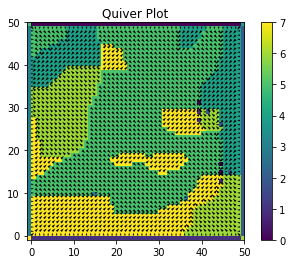

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(policy, origin='lower',extent=[-1,50,-1,50])

# ax.quiver(V,U)
ax.quiver(V,U,scale=1.5,width=0.3,units='xy')
fig.colorbar(im)
ax.set(aspect=1, title='Quiver Plot')
plt.show()

In [8]:
# for i in range(1,26):
#     pol = npy.loadtxt("Data/All_Used/reward_{0}/output_policy.txt".format(i))
#     npy.save("Policy_{0}.npy".format(i),pol)   

In [9]:
# THIS IS THE ACTUAL INTERPOLATION OF THE POLICY:
# X,Y = npy.mgrid[0:50,0:50]
X,Y = npy.mgrid[-25:25,-25:25]
test_range = npy.arange(-25,25,0.5)
print(len(test_range))
# policy_x = npy.zeros((50,50),dtype='int')
# policy_y = npy.zeros((50,50),dtype='int')
# for i in range(50):
#     for j in range(50):
#         policy_x[i,j] = action_space[policy[i,j],0]
#         policy_y[i,j] = action_space[policy[i,j],1]

policy[npy.where(policy==8.)]=0

func_x = interpolate.interp2d(X,Y,action_space[policy,0])
func_y = interpolate.interp2d(X,Y,action_space[policy,1])

# func_x = interpolate.interp2d(X,Y,policy_x)
# func_y = interpolate.interp2d(X,Y,policy_y)


100


/usr/local/lib/python2.7/dist-packages/scipy/interpolate/fitpack.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=52,53 m=2500 fp=0.329474 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/usr/local/lib/python2.7/dist-packages/scipy/interpolate/fitpack.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=61,45 m=2500 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [10]:
interp_policy_x = func_x(test_range,test_range)
interp_policy_y = func_y(test_range,test_range)

In [11]:
resize_pol = copy.deepcopy(policy)
# resize_pol = npy.zeros((50,50),dtype=npy.float32)
resize_pol = resize_pol.astype(float)
fac = 2
# resize_pol = cv2.resize(resize_pol,(fac*resize_pol.shape[0],fac*resize_pol.shape[1]))
resize_pol = cv2.resize(resize_pol,(100,100))
resize_pol.shape

(100, 100)

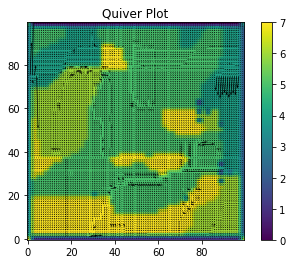

In [12]:
fig, ax = plt.subplots()
# im = ax.imshow(policy, origin='lower',extent=[-1,50,-1,50])
# im = ax.imshow(policy, origin='lower',extent=[-25,25,-25,25])
im = ax.imshow(resize_pol,origin='lower')
# ax.quiver(V,U)
ax.quiver(interp_policy_x,interp_policy_y,scale=1.5,width=0.3,units='xy')
# ax.quiver(interp_policy_y,interp_policy_x,scale=1.2,width=0.5,units='xy')
fig.colorbar(im)
ax.set(aspect=1, title='Quiver Plot')
plt.show()

In [13]:
# policy3d = npy.zeros((3,3,3))
policy3d = npy.random.randint(0,6,(27))

In [14]:
# [sx,sy,sz] = npy.random.random(3)
sx,sy,sz = [0.11,0.45,0.77]
s = npy.array([0.11,0.45,0.77])
int_pts = [1,2,4,5,10,11,13,14]

[5 5 3 0 5 0 0 5 4 0 3 3 5 2 2 1 4 3 4 5 1 4 3 5 0 1 3]
[[-1  0  0]
 [-1  0  0]
 [ 0 -1  0]
 [ 0  0  1]
 [-1  0  0]
 [ 0  0  1]
 [ 0  0  1]
 [-1  0  0]
 [ 1  0  0]
 [ 0  0  1]
 [ 0 -1  0]
 [ 0 -1  0]
 [-1  0  0]
 [ 0  1  0]
 [ 0  1  0]
 [ 0  0 -1]
 [ 1  0  0]
 [ 0 -1  0]
 [ 1  0  0]
 [-1  0  0]
 [ 0  0 -1]
 [ 1  0  0]
 [ 0 -1  0]
 [-1  0  0]
 [ 0  0  1]
 [ 0  0 -1]
 [ 0 -1  0]]


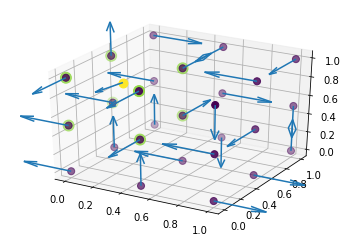

In [22]:


# space_range = npy.linspace(0,1,3)
# x,y,z=npy.meshgrid(space_range,space_range,space_range,indexing='ij')
# x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')

# points = npy.zeros((3,3,3,3))
# for i in range(3):
#     for j in range(3):
#         for k in range(3):
#             points[i,j,k] = [i%2,j%2,k%2]


print(policy3d)
action_list = [[0,0,1],[0,0,-1],[0,1,0],[0,-1,0],[1,0,0],[-1,0,0]]
actions = npy.array([action_list[i] for i in policy3d])
print(actions)
            
points = npy.zeros((27,3))                             
for i in range(3):
    for j in range(3):
        for k in range(3):
            points[9*i+3*j+k] = [float(i)/2,float(j)/2,float(k)/2]


fig1 = plt.figure()

ax1 = fig1.gca(projection='3d')
ax1.scatter(points[:,0],points[:,1],points[:,2],c=npy.zeros(27),vmin=0,vmax=30,s=50)
# ax1.quiver(points[:,0],points[:,1],points[:,2],policy3d[:,0],policy3d[:,1],policy3d[:,2],pivot='tail')
ax1.quiver(points[:,0],points[:,1],points[:,2],actions[:,0],actions[:,1],actions[:,2],pivot='tail',length=0.35,)

ax1.quiver(s[0],s[1],s[2],vector[0],vector[1],vector[2],pivot='tail',length=0.35)

ax1.scatter(points[int_pts,0],points[int_pts,1],points[int_pts,2],s=120,vmin=0,vmax=30,c=25*npy.ones(8))
ax1.scatter(sx,sy,sz,c=30,vmin=0,vmax=30,s=80)
plt.show()
# ax1.plot(points[:,0],points[:,1],points[:,2])

In [23]:
coeff = npy.product(abs(s-points[int_pts]),axis=1)
coeff/=coeff.sum()
coeff

array([ 0.10692,  0.09108,  0.01188,  0.01012,  0.37908,  0.32292,
        0.04212,  0.03588])

In [24]:
points[int_pts]

array([[ 0. ,  0. ,  0.5],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.5,  0.5],
       [ 0. ,  0.5,  1. ],
       [ 0.5,  0. ,  0.5],
       [ 0.5,  0. ,  1. ],
       [ 0.5,  0.5,  0.5],
       [ 0.5,  0.5,  1. ]])

In [25]:
vector = npy.dot(coeff,actions[int_pts])
vector

array([-0.1188 , -0.71508,  0.01012])

In [26]:
vector/npy.linalg.norm(vector)

array([-0.16387294, -0.98638268,  0.01395955])

In [28]:
valx = scind(points,actions[:,0],fill_value=0)
valy = scind(points,actions[:,1],fill_value=0)
valz = scind(points,actions[:,2],fill_value=0)
v_interp = [valx(s)[0],valy(s)[0],valz(s)[0]]
v_interp / npy.linalg.norm(v_interp)

array([-0.40590605,  0.0338255 ,  0.91328862])

In [29]:
valrg = scirgi(points,actions,fill_value=0)
# valrgy = scirgi(points,actions[:,1],fill_value=0)
# valrgz = scirgi(points,actions[:,2],fill_value=0)
# v_interp = [valx(s)[0],valy(s)[0],valz(s)[0]]

ValueError: There are 27 point arrays, but values has 2 dimensions

In [30]:
actions.shape, points.shape

((27, 3), (27, 3))

In [31]:
act27 = npy.zeros((27,3))
for i in range(3):
    for j in range(3):
        for k in range(3):
            act27[9*i+3*j+k]=[i-1,j-1,k-1]/(npy.linalg.norm([i-1,j-1,k-1]))


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


In [32]:
# nact27 = npy.linalg.norm(act27,axis=1)
act27



array([[-0.57735027, -0.57735027, -0.57735027],
       [-0.70710678, -0.70710678,  0.        ],
       [-0.57735027, -0.57735027,  0.57735027],
       [-0.70710678,  0.        , -0.70710678],
       [-1.        ,  0.        ,  0.        ],
       [-0.70710678,  0.        ,  0.70710678],
       [-0.57735027,  0.57735027, -0.57735027],
       [-0.70710678,  0.70710678,  0.        ],
       [-0.57735027,  0.57735027,  0.57735027],
       [ 0.        , -0.70710678, -0.70710678],
       [ 0.        , -1.        ,  0.        ],
       [ 0.        , -0.70710678,  0.70710678],
       [ 0.        ,  0.        , -1.        ],
       [        nan,         nan,         nan],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.70710678, -0.70710678],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.70710678],
       [ 0.57735027, -0.57735027, -0.57735027],
       [ 0.70710678, -0.70710678,  0.        ],
       [ 0.57735027, -0.57735027,  0.577

In [33]:
nvect = vector/npy.linalg.norm(vector)
nvect

array([-0.16387294, -0.98638268,  0.01395955])

In [34]:
npy.dot(act27,nvect)

array([ 0.65604084,  0.81335355,  0.67215994,  0.10600478,  0.16387294,
        0.12574656, -0.48293577, -0.58160221, -0.46681667,  0.68760699,
        0.98638268,  0.70734877, -0.01395955,         nan,  0.01395955,
       -0.70734877, -0.98638268, -0.68760699,  0.46681667,  0.58160221,
        0.48293577, -0.12574656, -0.16387294, -0.10600478, -0.67215994,
       -0.81335355, -0.65604084])

<IPython.core.display.Javascript object>


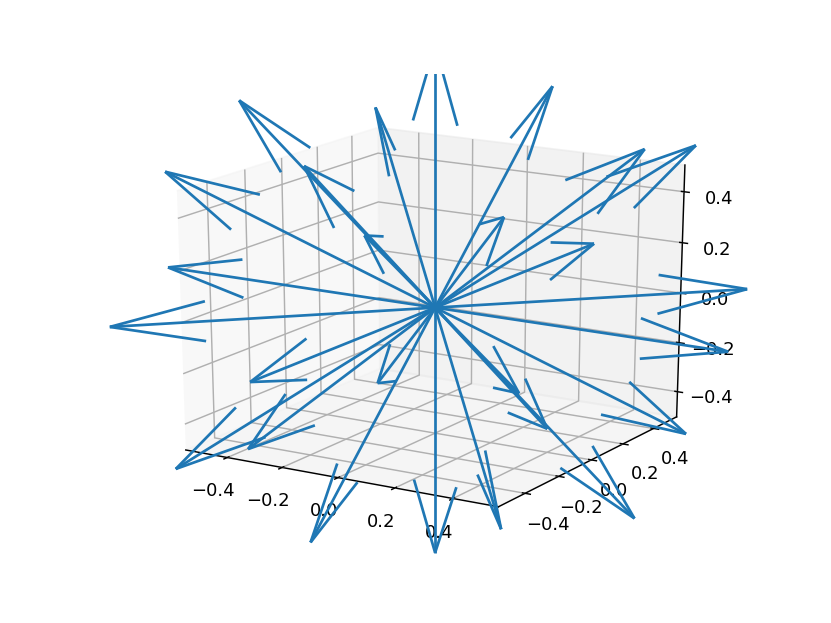

In [37]:
fig3 = plt.figure()
# ax3 = fig3.gca(projection='3d')
ax3 = fig3.add_subplot(111,projection='3d')
ax3.quiver(npy.zeros(27),npy.zeros(27),npy.zeros(27),act27[:,0],act27[:,1],act27[:,2],pivot='tail',normalize=True)
plt.show()